In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import wimprates as wr
assert wr.__version__ !='0.2.2'
wr.__version__

'0.3.1'

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import numericalunits as nu

In [5]:
from tqdm import tqdm

In [6]:
from scipy.integrate import quad as scipy_int

In [7]:
import pandas as pd

In [8]:
import scipy

In [9]:
import emcee
emcee.__version__

'3.0.0'

In [10]:
import corner

In [11]:
import time

# Direct detection of Dark matter using different target materials #

Author:

Joran Angevaare <j.angevaare@nikef.nl>

Date:

14 october 2019 

## Goal ## 

- Roughly reproduce <https://journals.aps.org/prd/abstract/10.1103/PhysRevD.83.083505>
- Update the results thereof with more recent knowledge of the DM-distribution

### Approach ###
To achieve these goals, we must first get a decent recoil spectrum, that is flexible enough to have different astrophysical parameters. Further, it must also be flexible enough to be able to allow for different analytic functions to be added to the model. For instance, we must be able to incorporate the $\rm{SHM}^{++}$ as presented here <https://arxiv.org/abs/1810.11468>.

When we have a sufficiently flexible model, we want to add in the detector physics, we should therein incorporate at least the following parameters:
- target
  - material
  - cross-section
- threshold
- background
- cut efficiency  
- volume
- exposure

Finally we should perform the inference

# Emcee #
<https://emcee.readthedocs.io/en/stable/tutorials/quickstart/>

## Distribution of the DM ##
First we need to make a DM-rate spectrum

In [12]:
stats = dddm.NestleStatModel("Xe")

StatModel::	initialized for Xe detector. See print(stat_model) for default settings


In [13]:
stats.check_spectrum()

,counts,bin_centers,bin_left,bin_right
0,27.391302,5.0,0.0,10.0
1,208.833173,15.0,10.0,20.0
2,86.353906,25.0,20.0,30.0
3,29.497642,35.0,30.0,40.0
4,9.322992,45.0,40.0,50.0
5,2.674535,55.0,50.0,60.0
6,0.672017,65.0,60.0,70.0
7,0.137943,75.0,70.0,80.0
8,0.019942,85.0,80.0,90.0
9,0.001549,95.0,90.0,100.0


In [14]:
stats.nlive = 100
stats.tol = 0.9
stats.log

{'did_run': False, 'saved_in': None}

In [15]:
start = time.time()
stats.run_nestle()
end = time.time()

run_nestle::	start_fit for 2 parameters
run_nestle::	fit_done in 216 s (0.1 h)


In [16]:
stats.save_results()

open_save_dir::	using results/nestle55/
	 log_mass  1.72 +/-  0.04
	 mass 52.3 +/- 4.4
	 log_cross_section -45.00 +/-  0.02
	 cross_section 1e-45 +/- 5.4e-47
save_results::	done_saving


In [17]:
stats.log['saved_in']= "results/nestle51/"

load_nestle_samples::	loading results/nestle51/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']


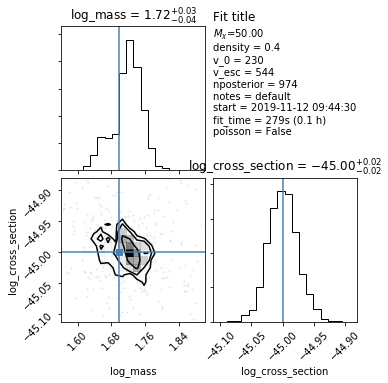

In [18]:
stats.show_corner()

In [19]:
None is not None

False

In [ ]:
!run_dddm_nestle.py

In [20]:
first_res = stats.get_summary()
first_res

	 log_mass  1.72 +/-  0.04
	 mass 52.3 +/- 4.4
	 log_cross_section -45.00 +/-  0.02
	 cross_section 1e-45 +/- 5.4e-47


{'nestle_nposterior': 129,
 'nestle_time': 216,
 'nestle_logZ': -11.79435910627196,
 'nestle_logZerr': 0.26831537991117843,
 'summary': 'niter: 896\nncall: 1904\nnsamples: 996\nlogz: -11.794 +/-  0.268\nh:  7.199',
 'N_posterior_samples ': 129,
 'log_mass_fit_res': ' 1.72 +/-  0.04',
 'mass_fit_res': '52.3 +/- 4.4',
 'log_cross_section_fit_res': '-45.00 +/-  0.02',
 'cross_section_fit_res': '1e-45 +/- 5.4e-47'}

In [21]:
stats_30bins = dddm.NestleStatModel("Xe")
stats_30bins.set_benchmark(20,-45)
stats_30bins.config['n_energy_bins'] = 30

stats_30bins.eval_benchmark()


StatModel::	initialized for Xe detector. See print(stat_model) for default settings
StatModel::	taking log10 of mass of 20
StatModel::	re-evaluate benchmark


In [22]:
stats_30bins.check_spectrum()

,counts,bin_centers,bin_left,bin_right
0,2.548725e-03,1.666667,0.000000,3.333333
1,5.790253e-01,5.000000,3.333333,6.666667
2,1.086965e+01,8.333333,6.666667,10.000000
3,2.646850e+01,11.666667,10.000000,13.333333
4,1.652730e+01,15.000000,13.333333,16.666667
5,6.377083e+00,18.333333,16.666667,20.000000
6,2.231391e+00,21.666667,20.000000,23.333333
7,7.061249e-01,25.000000,23.333333,26.666667
8,1.899223e-01,28.333333,26.666667,30.000000
9,3.933317e-02,31.666667,30.000000,33.333333


In [22]:
stats_30bins.nlive = 100
stats_30bins.tol = 0.9
stats_30bins.log

{'did_run': False, 'saved_in': None}

In [24]:
stats_30bins.run_nestle()

run_nestle::	start_fit for 2 parameters
run_nestle::	fit_done in 661 s (0.2 h)


In [25]:
second_res = stats_30bins.get_summary()
second_res

	 log_mass  1.69 +/-  0.04
	 mass 48.8 +/- 4.1
	 log_cross_section -44.99 +/-  0.03
	 cross_section 1.01e-45 +/- 5.9e-47


{'nestle_nposterior': 119,
 'nestle_time': 661,
 'nestle_logZ': -21.07605593356324,
 'nestle_logZerr': 0.25722109671568694,
 'summary': 'niter: 824\nncall: 1993\nnsamples: 924\nlogz: -21.076 +/-  0.257\nh:  6.616',
 'N_posterior_samples ': 119,
 'log_mass_fit_res': ' 1.69 +/-  0.04',
 'mass_fit_res': '48.8 +/- 4.1',
 'log_cross_section_fit_res': '-44.99 +/-  0.03',
 'cross_section_fit_res': '1.01e-45 +/- 5.9e-47'}

In [26]:
stats_30bins.save_results()

open_save_dir::	using results/nestle56/
	 log_mass  1.69 +/-  0.04
	 mass 48.8 +/- 4.1
	 log_cross_section -44.99 +/-  0.03
	 cross_section 1.01e-45 +/- 5.9e-47
save_results::	done_saving


In [27]:
stats_30bins.log['saved_in']= "results/nestle53/"

load_nestle_samples::	loading results/nestle53/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']


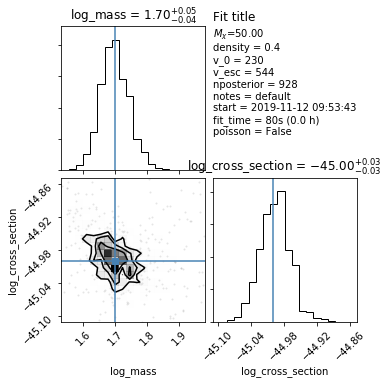

In [28]:
stats_30bins.show_corner()

In [29]:
# rest = dddm.load_nestle_samples("nestle",0)
# dddm.nestle_corner(rest)

In [30]:
fname = dddm.open_save_dir('test_new')

open_save_dir::	using results/test_new0/


In [31]:
fname

'results/test_new0/'

## Full dimensionality ##

In [32]:
stats_full = dddm.NestleStatModel("Xe")

StatModel::	initialized for Xe detector. See print(stat_model) for default settings


In [33]:
stats_full.get_summary()

run_nestle::	start_fit for 2 parameters
run_nestle::	fit_done in 3381 s (0.9 h)
	 log_mass  1.72 +/-  0.04
	 mass 52 +/- 4.4
	 log_cross_section -45.00 +/-  0.02
	 cross_section 1e-45 +/- 5.6e-47


{'nestle_nposterior': 3418,
 'nestle_time': 3381,
 'nestle_logZ': -11.884602983668257,
 'nestle_logZerr': 0.08399416501478868,
 'summary': 'niter: 11529\nncall: 27302\nnsamples: 12553\nlogz: -11.885 +/-  0.084\nh:  7.224',
 'N_posterior_samples ': 3418,
 'log_mass_fit_res': ' 1.72 +/-  0.04',
 'mass_fit_res': '52 +/- 4.4',
 'log_cross_section_fit_res': '-45.00 +/-  0.02',
 'cross_section_fit_res': '1e-45 +/- 5.6e-47'}

In [34]:
stats_full.log

{'did_run': True, 'saved_in': None}

In [35]:
# for key in stats_full.log.keys():
#     stats_full.log[key] = False


In [36]:
stats_full.nwalkers = stats.nwalkers
stats_full.nsteps = stats.nsteps * 2
stats_full.log

AttributeError: 'NestleStatModel' object has no attribute 'nwalkers'

In [ ]:
stats_full.fit_parameters = stats_full.known_parameters

In [ ]:
stats_full.check_spectrum()

In [ ]:
start = time.time()
stats_full.run_emcee()
end = time.time()

In [ ]:
end-start

In [ ]:
stats_full.save_results()

In [ ]:
9170.64813709259/3600

In [ ]:
assert stats_full.log['did_run']

In [ ]:
stats_full.show_walkers()

In [ ]:
stats_full.show_corner()

In [ ]:
corner.corner(
    stats_full.sampler.get_chain(
        flat=True,
        thin = 50,
        discard=int(stats_full.nsteps * 0.2)
    ),
              labels=stats_full.fit_parameters);